In [6]:
# import osmnx
import osmnx as ox
import geopandas as gpd

# Specify the area of interest
place_name = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.11383 51.51826, -0.11380 51.51812...",51.523312,51.506871,-0.072762,-0.11383,259210805,relation,51800,51.515618,-0.091998,boundary,administrative,12,0.656625,city,City of London,"City of London, Greater London, England, Unite..."


<AxesSubplot: >

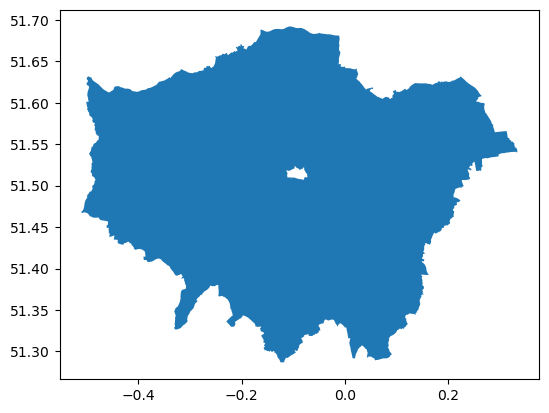

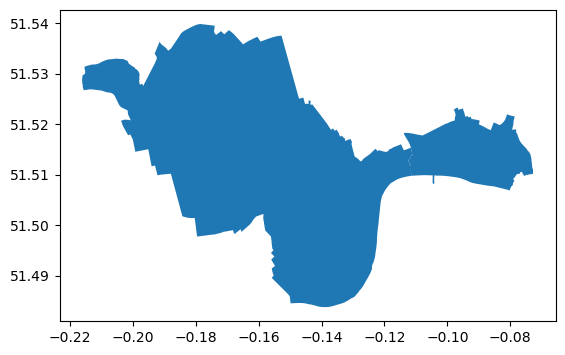

In [7]:
# import osmnx
import osmnx as ox
import geopandas as gpd
import pandas as pd

# Specify the area of interest
place_name_GL = "London, England, UK"

# Get place boundary related to the place name as a geodataframe
GL = ox.geocode_to_gdf(place_name_GL)

GL.plot()

# Specify the area of interest
Westminster = "Westminster, England, UK"
City = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(Westminster)
area2 = ox.geocode_to_gdf(City)

area_both = pd.concat([area, area2])

area_both.plot()



In [8]:
# List key-value pairs for tags
tags = {'tourism': "attraction"}   

attractionsCity = ox.features_from_place(City, tags)
attractionsWest = ox.features_from_place(Westminster, tags)
attractions = pd.concat([attractionsCity, attractionsWest])
attractions.head()
#print(attractions.columns.tolist())

geometry  \
element_type osmid                                                            
node         5520405422                           POINT (-0.07902 51.51788)   
             6448535913                           POINT (-0.09373 51.51750)   
             8047413197                           POINT (-0.10047 51.51359)   
             10996315066                          POINT (-0.10996 51.51435)   
way          4959489      POLYGON ((-0.07993 51.51447, -0.07994 51.51440...   

                         addr:city addr:country addr:housenumber  \
element_type osmid                                                 
node         5520405422        NaN          NaN              NaN   
             6448535913        NaN          NaN              NaN   
             8047413197        NaN          NaN              NaN   
             10996315066       NaN          NaN              NaN   
way          4959489        London          NaN               30   

                             addr:street  \
element_type osmid                         
node         5520405422              NaN   
             6448535913              NaN   
             8047413197              NaN   
             10996315066             NaN   
way          4959489      Saint Mary Axe   

                                                                     source  \
element_type osmid                                                            
node         5520405422                                                 NaN   
             6448535913                                                 NaN   
             8047413197   https://www.visitlondon.com/things-to-do/place...   
             10996315066                                                NaN   
way          4959489                                                    NaN   

                         amenity                             name level  \
element_type osmid                                                        
node         5520405422      NaN            Petticoat Lane Market   NaN   
             6448535913      NaN                       Alban Gate   NaN   
             8047413197      NaN               City Visitor Trail   NaN   
             10996315066     NaN  Behind Sweeney Todd barber shop   NaN   
way          4959489         NaN                   30 St Mary Axe   NaN   

                         wheelchair  ... name:kk name:mai name:ml name:ne  \
element_type osmid                   ...                                    
node         5520405422         yes  ...     NaN      NaN     NaN     NaN   
             6448535913         NaN  ...     NaN      NaN     NaN     NaN   
             8047413197         NaN  ...     NaN      NaN     NaN     NaN   
             10996315066        NaN  ...     NaN      NaN     NaN     NaN   
way          4959489            yes  ...     NaN      NaN     NaN     NaN   

                         name:pms name:te name:tl name:tt name:yi ref:GB:uprn  
element_type osmid                                                             
node         5520405422       NaN     NaN     NaN     NaN     NaN         NaN  
             6448535913       NaN     NaN     NaN     NaN     NaN         NaN  
             8047413197       NaN     NaN     NaN     NaN     NaN         NaN  
             10996315066      NaN     NaN     NaN     NaN     NaN         NaN  
way          4959489          NaN     NaN     NaN     NaN     NaN         NaN  

[5 rows x 277 columns]

<AxesSubplot: >

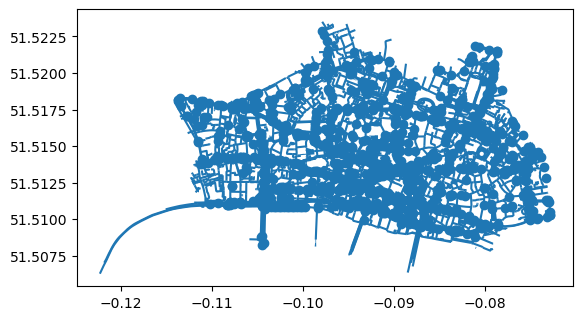

In [9]:
# List key-value pairs for tags
place_name = "City of London, England, UK"
tags = {'highway': True}   
streets = ox.features_from_place(place_name, tags)
streets.plot()

In [10]:
streets.head()

button_operated         crossing   highway tactile_paving  \
element_type osmid                                                              
node         104319             yes  traffic_signals  crossing            yes   
             104320             yes  traffic_signals  crossing            NaN   
             107606             NaN  traffic_signals  crossing            yes   
             107643             NaN  traffic_signals  crossing            NaN   
             108389             NaN  traffic_signals  crossing            yes   

                    traffic_signals:sound traffic_signals:vibration  \
element_type osmid                                                    
node         104319                    no                       yes   
             104320                   NaN                       NaN   
             107606                   NaN                       NaN   
             107643                   NaN                       NaN   
             108389                    no                       NaN   

                                      geometry crossing_ref crossing:island  \
element_type osmid                                                            
node         104319  POINT (-0.09881 51.51537)          NaN             NaN   
             104320  POINT (-0.09688 51.51472)      pelican             NaN   
             107606  POINT (-0.07780 51.51312)      pelican              no   
             107643  POINT (-0.09601 51.51192)      pelican        separate   
             108389  POINT (-0.10780 51.51761)      pelican             NaN   

                    traffic_calming  ... disused:cycleway:right  \
element_type osmid                   ...                          
node         104319             NaN  ...                    NaN   
             104320             NaN  ...                    NaN   
             107606             NaN  ...                    NaN   
             107643             NaN  ...                    NaN   
             108389             NaN  ...                    NaN   

                    proposed:emergency is_sidepath:of:name name:left  \
element_type osmid                                                     
node         104319                NaN                 NaN       NaN   
             104320                NaN                 NaN       NaN   
             107606                NaN                 NaN       NaN   
             107643                NaN                 NaN       NaN   
             108389                NaN                 NaN       NaN   

                    name:right surface:note ref:bag area:highway ways type  
element_type osmid                                                          
node         104319        NaN          NaN     NaN          NaN  NaN  NaN  
             104320        NaN          NaN     NaN          NaN  NaN  NaN  
             107606        NaN          NaN     NaN          NaN  NaN  NaN  
             107643        NaN          NaN     NaN          NaN  NaN  NaN  
             108389        NaN          NaN     NaN          NaN  NaN  NaN  

[5 rows x 291 columns]

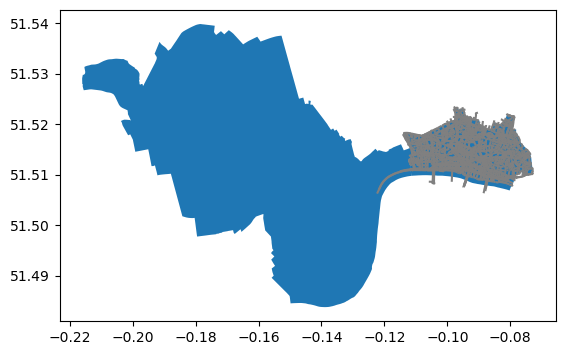

In [12]:
streets_S = streets.loc[streets.geometry.geometry.type=='LineString']
base = area_both.plot()
base2 = streets_S.plot(ax=base, color = "grey")

geometry  \
element_type osmid                                                          
way          33083748   POLYGON ((-0.09636 51.51442, -0.09612 51.51438...   
             367646970  POLYGON ((-0.08747 51.51340, -0.08747 51.51341...   

                                                                    nodes  \
element_type osmid                                                          
way          33083748   [373348206, 3269232240, 3269232238, 4390540714...   
             367646970  [3715515068, 3715515076, 3715515073, 371551506...   

                       addr:city addr:postcode addr:street building  \
element_type osmid                                                    
way          33083748     London      EC4M 9AF  New Change      yes   
             367646970    London           NaN    Cornhill      yes   

                       building:levels changing_table            name  \
element_type osmid                                                      
way          33083748                6            yes  One New Change   
             367646970             NaN            NaN  Royal Exchange   

                               name:en  ... heritage:operator  \
element_type osmid                      ...                     
way          33083748   One New Change  ...               NaN   
             367646970  Royal Exchange  ...                he   

                                                         heritage:website  \
element_type osmid                                                          
way          33083748                                                 NaN   
             367646970  https://historicengland.org.uk/listing/the-lis...   

                       inscription_date listed_status            name:ru  \
element_type osmid                                                         
way          33083748               NaN           NaN                NaN   
             367646970       1950-01-04       Grade I  Королевская биржа   

                       name:zh ref:GB:nhle   source:heritage wheelchair  \
element_type osmid                                                        
way          33083748      NaN         NaN               NaN        NaN   
             367646970   皇家交易所     1064713  Historic England        yes   

                       year_of_construction  
element_type osmid                           
way          33083748                   NaN  
             367646970          1841 - 1844  

[2 rows x 34 columns]

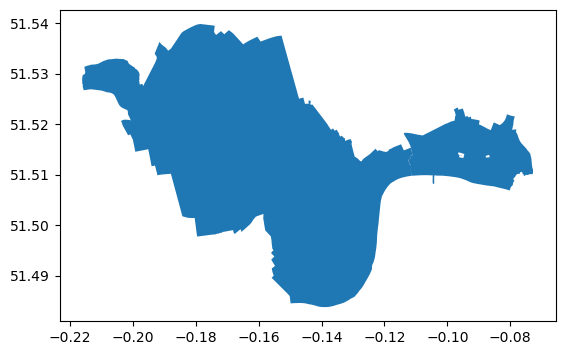

In [13]:
# List key-value pairs for tags
place_name = "City of London, England, UK"
tags = {'shop': "mall"}
base= area_both.plot()
shops = ox.features_from_place(place_name, tags)
shops.plot(ax=base, color="white")
shops.head()

<AxesSubplot: >

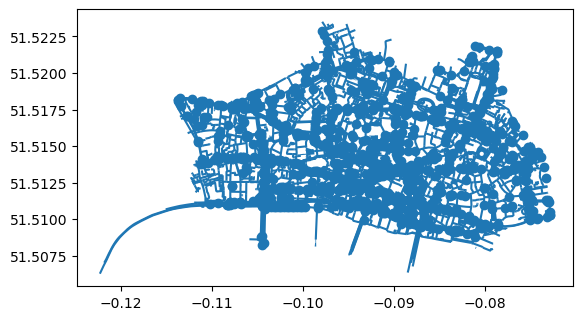

In [14]:
streets.plot()

In [15]:
attractions = attractions[["name", "geometry"]]
attractions = attractions.drop_duplicates(subset=['name'])
attractions_c = attractions[attractions['name'].notnull()]

# bb = attractions_c[attractions_c["name"] == "Big Ben"]
# bb
attractions_c


name  \
element_type osmid                                          
node         5520405422             Petticoat Lane Market   
             6448535913                        Alban Gate   
             8047413197                City Visitor Trail   
             10996315066  Behind Sweeney Todd barber shop   
way          4959489                       30 St Mary Axe   
...                                                   ...   
relation     3962877                     Trafalgar Square   
             5208404                    Buckingham Palace   
             8244923                   Little Dean's Yard   
             8250949                    Piccadilly Circus   
             16771773                      Red river hogs   

                                                                   geometry  
element_type osmid                                                           
node         5520405422                           POINT (-0.07902 51.51788)  
             6448535913                           POINT (-0.09373 51.51750)  
             8047413197                           POINT (-0.10047 51.51359)  
             10996315066                          POINT (-0.10996 51.51435)  
way          4959489      POLYGON ((-0.07993 51.51447, -0.07994 51.51440...  
...                                                                     ...  
relation     3962877      POLYGON ((-0.12870 51.50819, -0.12869 51.50818...  
             5208404      POLYGON ((-0.14209 51.50166, -0.14211 51.50166...  
             8244923      POLYGON ((-0.12759 51.49840, -0.12760 51.49835...  
             8250949      POLYGON ((-0.13466 51.50974, -0.13472 51.50982...  
             16771773     POLYGON ((-0.15437 51.53479, -0.15434 51.53478...  

[145 rows x 2 columns]

<AxesSubplot: >

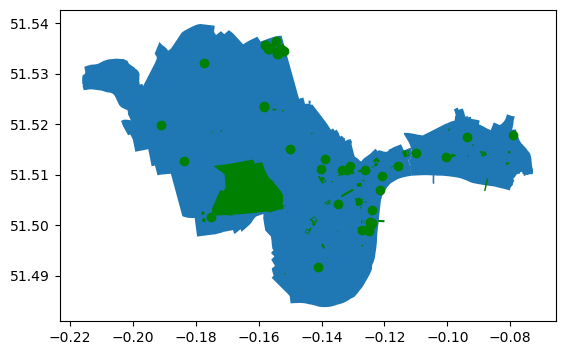

In [18]:
base = area_both.plot()
attractions.plot(ax=base, color='green')

In [45]:
from ipyleaflet import Map, Marker, GeoData, basemaps, LayersControl, Popup
from ipywidgets import HTML

center = (51.51788, -0.07902)
map = Map(center=center, zoom=12)

# Add a draggable marker to the map
# Dragging the marker updates the marker.location value in Python
#marker = Marker(location=center, draggable=True)
#map.add_control(marker)

geo_data_attractions = GeoData(geo_dataframe = attractions,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Attractions')

#map.add(geo_data_attractions, )
#map.add(LayersControl())

attraction_points = attractions.loc[attractions.geometry.geometry.type=='Point']

# coord_list = [(x,y) for x,y in zip(attraction_points['geometry'].x , attraction_points['geometry'].y)]
# print(coord_list)
# for poi in attraction_points.itertuples():
#     print(poi.name)
#     marker = Marker(location=(poi.geometry.x , poi.geometry.y), draggable=False)
#     pop = HTML()
#     pop.value = "Name:"
#     pop.description = poi.name
#     marker.popup = pop
#     print(pop)
#     map.add(marker)
#print(attraction_points.iloc)
#poi = attraction_points.iloc[0]
#print(poi)
#print(len(attraction_points))   28
laenge=range(len(attraction_points)-2)
#print(laenge)
for x in (laenge):
    # filter out a nan value at the 28th position of attraction_points
    if x==27:
        # do nothing
        useless=1
    else:
        poi = attraction_points.iloc[x]
        #print(poi[0])
        marker2 = Marker(location=(poi.geometry.y , poi.geometry.x), draggable=False)
        pop = HTML()
        pop.value = poi[0]
        #pop.description = poi[0]
        marker2.popup = pop
        #print(pop)
        map.add(marker2)

display(map)

Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…